<a href="https://colab.research.google.com/github/ThuanNaN/angelhack/blob/main/%5BOD%5D_GroundingDINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

In [ ]:
%cd GroundingDINO

In [ ]:
!pip install -e .

## Download ckeckpoint

In [ ]:
!mkdir weights
%cd weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
%cd ..

In [ ]:
!mkdir images

# Upload images to this folder

In [13]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import cv2

model = load_model("groundingdino/config/GroundingDINO_SwinT_OGC.py", "./weights/groundingdino_swint_ogc.pth")
IMAGE_PATH = "./images/ban_nhau.jpg"
TEXT_PROMPT = "beer . banner ."
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
cv2.imwrite("ban_nhau_output.jpg", annotated_frame)

final text_encoder_type: bert-base-uncased


SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


True

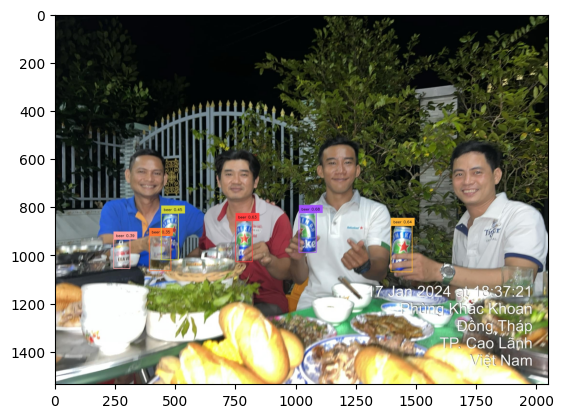

In [14]:
from matplotlib import pyplot as plt
from PIL import Image

ban_nhau_output = Image.open("ban_nhau_output.jpg")
plt.imshow(ban_nhau_output)
plt.show()

In [15]:
IMAGE_PATH = "./images/tap_hoa.jpg"
TEXT_PROMPT = "beer . banner . box"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
cv2.imwrite("tap_hoa_output.jpg", annotated_frame)

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


True

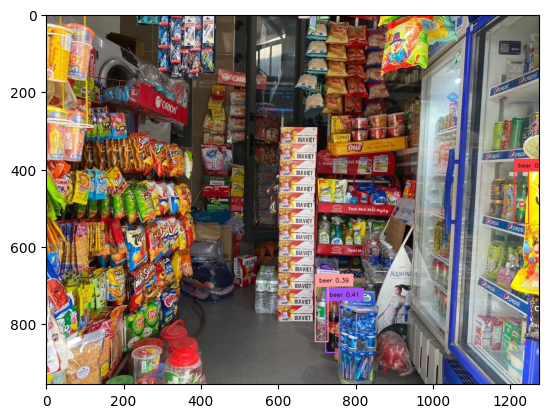

In [16]:
ban_nhau_output = Image.open("tap_hoa_output.jpg")
plt.imshow(ban_nhau_output)
plt.show()